In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('clean_resume_data.csv')

In [3]:
print(df.columns.tolist())

['ID', 'Category', 'Feature']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [5]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [9]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2483 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2483 non-null   int64 
 1   Category  2483 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.6+ KB


In [11]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      119
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

<Axes: title={'center': 'Category Distribution'}, xlabel='Category'>

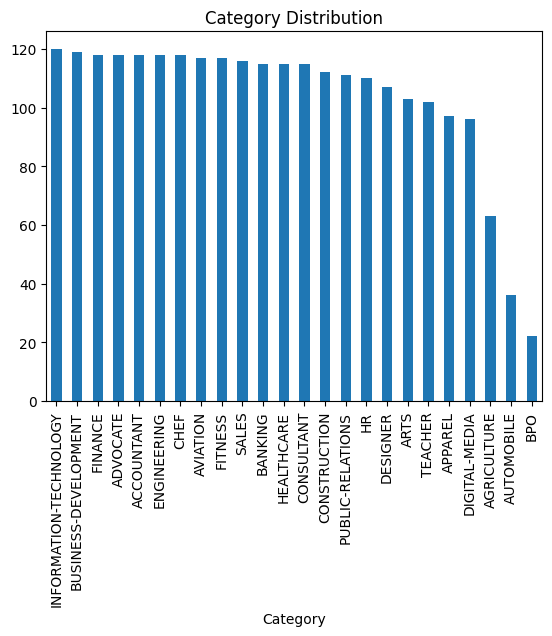

In [12]:
df['Category'].value_counts().plot(kind='bar', title='Category Distribution')


In [13]:
df['word_count'] = df['Feature'].apply(lambda x: len(str(x).split()))
print(df['word_count'].describe())  # Statistical summary of word counts


count    2483.000000
mean      587.250906
std       257.390903
min        77.000000
25%       477.500000
50%       549.000000
75%       677.500000
max      3565.000000
Name: word_count, dtype: float64


In [14]:
from sklearn.utils import resample
df_resampled = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < 120:
        category_upsampled = resample(category_data,
                                      replace=True,  
                                      n_samples=120,  
                                      random_state=42)
        df_resampled.append(category_upsampled)
    else:
        df_resampled.append(category_data)
df_balanced = pd.concat(df_resampled)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(df_balanced['Category'].value_counts())

Category
TEACHER                   120
DIGITAL-MEDIA             120
BUSINESS-DEVELOPMENT      120
ENGINEERING               120
PUBLIC-RELATIONS          120
BANKING                   120
CONSULTANT                120
AGRICULTURE               120
APPAREL                   120
INFORMATION-TECHNOLOGY    120
DESIGNER                  120
ADVOCATE                  120
HEALTHCARE                120
CHEF                      120
ARTS                      120
AVIATION                  120
FINANCE                   120
FITNESS                   120
ACCOUNTANT                120
SALES                     120
BPO                       120
AUTOMOBILE                120
CONSTRUCTION              120
HR                        120
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df_balanced['Feature']
y = df_balanced['Category']


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_vectorized = vectorizer.fit_transform(X)

In [19]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=1000)  # Try 1000, 1500, 2000
X_new = selector.fit_transform(X_vectorized, y)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred = rf_model.predict(X_test)

In [26]:
from sklearn.metrics import recall_score

In [32]:
print(set(y_test))
print(set(y_pred))



{'ENGINEERING', 'AVIATION', 'FITNESS', 'CONSTRUCTION', 'INFORMATION-TECHNOLOGY', 'ARTS', 'BPO', 'HR', 'CONSULTANT', 'APPAREL', 'CHEF', 'ADVOCATE', 'AUTOMOBILE', 'TEACHER', 'SALES', 'ACCOUNTANT', 'HEALTHCARE', 'FINANCE', 'AGRICULTURE', 'DESIGNER', 'DIGITAL-MEDIA', 'BANKING', 'PUBLIC-RELATIONS', 'BUSINESS-DEVELOPMENT'}
{'ENGINEERING', 'AVIATION', 'FITNESS', 'CONSTRUCTION', 'INFORMATION-TECHNOLOGY', 'BPO', 'ARTS', 'HR', 'CONSULTANT', 'APPAREL', 'CHEF', 'ADVOCATE', 'AUTOMOBILE', 'SALES', 'TEACHER', 'ACCOUNTANT', 'HEALTHCARE', 'FINANCE', 'AGRICULTURE', 'DESIGNER', 'DIGITAL-MEDIA', 'BANKING', 'PUBLIC-RELATIONS', 'BUSINESS-DEVELOPMENT'}


In [33]:
from sklearn.metrics import recall_score

# y_test and y_pred are your true labels and predicted labels respectively.
# For multi-class, set average='macro' or 'weighted' based on your preference.
recall = recall_score(y_test, y_pred, average='macro')  # For macro-average recall
print(f'Recall (Macro Average): {recall}')


Recall (Macro Average): 0.9125988630249529


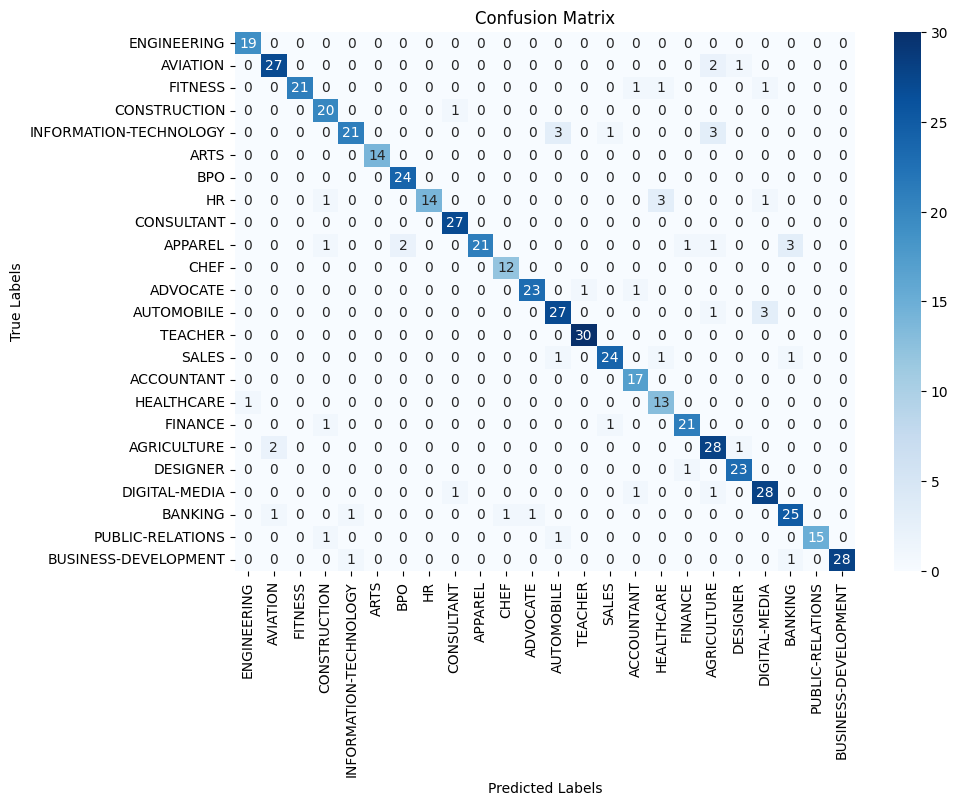

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_test and y_pred are your true labels and predicted labels respectively.
cm = confusion_matrix(y_test, y_pred)


# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [79]:
from sklearn.metrics import accuracy_score, classification_report

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.62%


In [81]:
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.95      1.00      0.97        19
              ADVOCATE       0.90      0.90      0.90        30
           AGRICULTURE       1.00      0.88      0.93        24
               APPAREL       0.83      0.95      0.89        21
                  ARTS       0.91      0.75      0.82        28
            AUTOMOBILE       1.00      1.00      1.00        14
              AVIATION       0.92      1.00      0.96        24
               BANKING       1.00      0.74      0.85        19
                   BPO       0.93      1.00      0.96        27
  BUSINESS-DEVELOPMENT       1.00      0.72      0.84        29
                  CHEF       0.92      1.00      0.96        12
          CONSTRUCTION       0.96      0.92      0.94        25
            CONSULTANT       0.84      0.87      0.86        31
              DESIGNER       0.97      1.00      0.98        30
         DIGITAL-MEDIA       0.92      

In [37]:
df1=pd.read_csv('jobs_dataset_with_features.csv')

In [38]:
df1.head

<bound method NDFrame.head of                                Role  \
0              Social Media Manager   
1            Frontend Web Developer   
2           Quality Control Manager   
3         Wireless Network Engineer   
4                Conference Manager   
...                             ...   
1615935  Mechanical Design Engineer   
1615936                 IT Director   
1615937  Mechanical Design Engineer   
1615938        Training Coordinator   
1615939             Wedding Planner   

                                                  Features  
0        5 to 15 Years Digital Marketing Specialist M.T...  
1        2 to 12 Years Web Developer BCA HTML, CSS, Jav...  
2        0 to 12 Years Operations Manager PhD Quality c...  
3        4 to 11 Years Network Engineer PhD Wireless ne...  
4        1 to 12 Years Event Manager MBA Event planning...  
...                                                    ...  
1615935  0 to 12 Years Mechanical Engineer B.Tech Mecha...  
1615936  2 to

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615940 entries, 0 to 1615939
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   Role      1615940 non-null  object
 1   Features  1615940 non-null  object
dtypes: object(2)
memory usage: 24.7+ MB


In [40]:
df1.columns.tolist()

['Role', 'Features']

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df1.isnull().sum()

Role        0
Features    0
dtype: int64

In [43]:
df1['Role'].value_counts()

Role
Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: count, Length: 376, dtype: int64

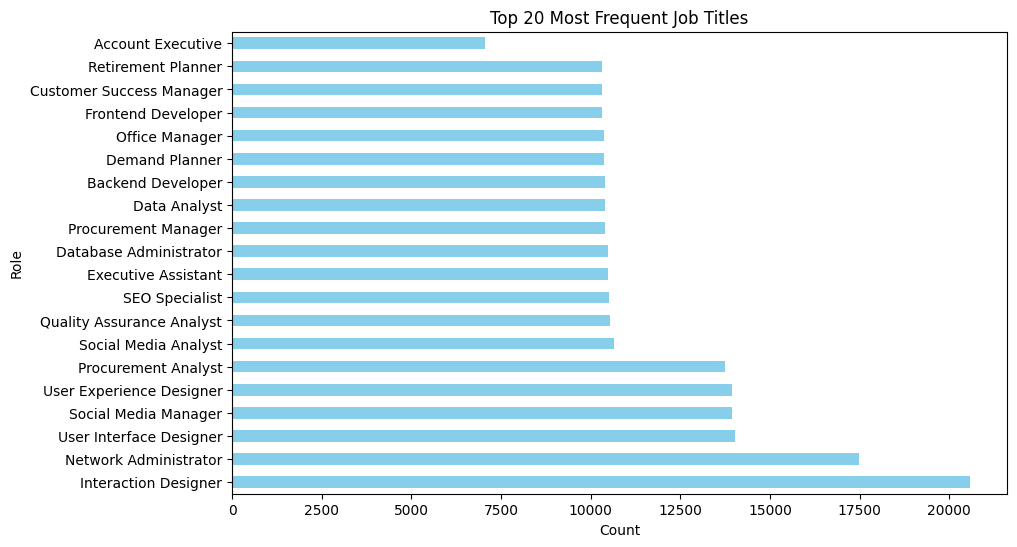

In [44]:
role_counts = df1['Role'].value_counts()
plt.figure(figsize=(10, 6))
role_counts.head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Most Frequent Job Titles')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [47]:
# Get role counts
role_counts = df1['Role'].value_counts()

# Filter roles with at least 8000 occurrences
valid_roles = role_counts[role_counts >= 7000].index

# Keep only rows with valid roles
df1_filtered = df1[df1['Role'].isin(valid_roles)]

print(df1_filtered['Role'].value_counts())  # Check the new distribution


Role
Interaction Designer             20580
Network Administrator            17470
User Interface Designer          14036
Social Media Manager             13945
User Experience Designer         13935
Procurement Analyst              13757
Social Media Analyst             10659
Quality Assurance Analyst        10541
SEO Specialist                   10512
Executive Assistant              10496
Database Administrator           10482
Procurement Manager              10407
Data Analyst                     10406
Backend Developer                10404
Demand Planner                   10362
Office Manager                   10361
Frontend Developer               10308
Customer Success Manager         10308
Retirement Planner               10305
Account Executive                 7063
Inside Sales Representative       7052
UX/UI Designer                    7028
Network Security Analyst          7027
Paralegal                         7021
Training Coordinator              7020
Event Coordinator   

In [48]:
df1_filtered['Role'].value_counts()

Role
Interaction Designer             20580
Network Administrator            17470
User Interface Designer          14036
Social Media Manager             13945
User Experience Designer         13935
Procurement Analyst              13757
Social Media Analyst             10659
Quality Assurance Analyst        10541
SEO Specialist                   10512
Executive Assistant              10496
Database Administrator           10482
Procurement Manager              10407
Data Analyst                     10406
Backend Developer                10404
Demand Planner                   10362
Office Manager                   10361
Frontend Developer               10308
Customer Success Manager         10308
Retirement Planner               10305
Account Executive                 7063
Inside Sales Representative       7052
UX/UI Designer                    7028
Network Security Analyst          7027
Paralegal                         7021
Training Coordinator              7020
Event Coordinator   

In [49]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1_filtered['Features'])  # Transform text data
y = df1_filtered['Role']  

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model1 = MultinomialNB()
model1.fit(X_train, y_train)


MultinomialNB()

In [52]:
y_pred = model1.predict(X_test)

In [53]:
from sklearn.metrics import recall_score

# y_test and y_pred are your true labels and predicted labels respectively.
# For multi-class, set average='macro' or 'weighted' based on your preference.
recall = recall_score(y_test, y_pred, average='macro')  # For macro-average recall
print(f'Recall (Macro Average): {recall}')


Recall (Macro Average): 1.0


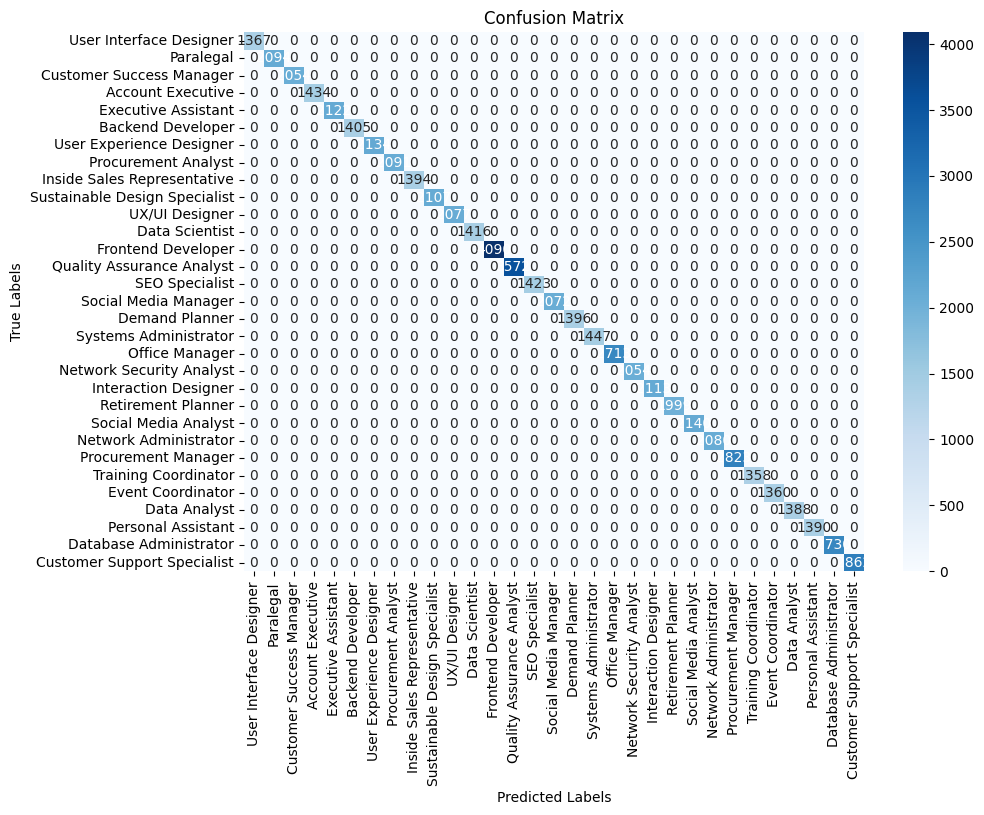

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# y_test and y_pred are your true labels and predicted labels respectively.
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [58]:
print("y_test labels:", set(y_test))
print("y_pred labels:", set(y_pred))


y_test labels: {'User Interface Designer', 'Paralegal', 'Customer Success Manager', 'Account Executive', 'Executive Assistant', 'Backend Developer', 'User Experience Designer', 'Procurement Analyst', 'Inside Sales Representative', 'Sustainable Design Specialist', 'UX/UI Designer', 'Data Scientist', 'Frontend Developer', 'Quality Assurance Analyst', 'SEO Specialist', 'Social Media Manager', 'Demand Planner', 'Systems Administrator', 'Office Manager', 'Network Security Analyst', 'Interaction Designer', 'Retirement Planner', 'Social Media Analyst', 'Network Administrator', 'Procurement Manager', 'Training Coordinator', 'Event Coordinator', 'Data Analyst', 'Personal Assistant', 'Database Administrator', 'Customer Support Specialist'}
y_pred labels: {'User Interface Designer', 'Paralegal', 'Customer Success Manager', 'Account Executive', 'Executive Assistant', 'Backend Developer', 'User Experience Designer', 'Procurement Analyst', 'Inside Sales Representative', 'Sustainable Design Specialis

In [59]:
import numpy as np
from sklearn.metrics import confusion_matrix

labels = list(set(y_test))  # all your job titles
cm = confusion_matrix(y_test, y_pred, labels=labels)

specificities = {}

for i, label in enumerate(labels):
    # For class 'label', we calculate:
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    specificities[label] = specificity

# Print specificities
for label, spec in specificities.items():
    print(f"Specificity for {label}: {spec:.2f}")


Specificity for User Interface Designer: 1.00
Specificity for Paralegal: 1.00
Specificity for Customer Success Manager: 1.00
Specificity for Account Executive: 1.00
Specificity for Executive Assistant: 1.00
Specificity for Backend Developer: 1.00
Specificity for User Experience Designer: 1.00
Specificity for Procurement Analyst: 1.00
Specificity for Inside Sales Representative: 1.00
Specificity for Sustainable Design Specialist: 1.00
Specificity for UX/UI Designer: 1.00
Specificity for Data Scientist: 1.00
Specificity for Frontend Developer: 1.00
Specificity for Quality Assurance Analyst: 1.00
Specificity for SEO Specialist: 1.00
Specificity for Social Media Manager: 1.00
Specificity for Demand Planner: 1.00
Specificity for Systems Administrator: 1.00
Specificity for Office Manager: 1.00
Specificity for Network Security Analyst: 1.00
Specificity for Interaction Designer: 1.00
Specificity for Retirement Planner: 1.00
Specificity for Social Media Analyst: 1.00
Specificity for Network Adm

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.0000
Classification Report:
                                precision    recall  f1-score   support

            Account Executive       1.00      1.00      1.00      1367
            Backend Developer       1.00      1.00      1.00      2094
     Customer Success Manager       1.00      1.00      1.00      2054
  Customer Support Specialist       1.00      1.00      1.00      1434
                 Data Analyst       1.00      1.00      1.00      2122
               Data Scientist       1.00      1.00      1.00      1405
       Database Administrator       1.00      1.00      1.00      2134
               Demand Planner       1.00      1.00      1.00      2091
            Event Coordinator       1.00      1.00      1.00      1394
          Executive Assistant       1.00      1.00      1.00      2107
           Frontend Developer       1.00      1.00      1.00      2077
  Inside Sales Representative       1.00      1.00      1.00      1416
         Interaction Designer

In [43]:
import pickle

# Save RandomForestClassifier model
with open("resume_screening_rf_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

# Save MultinomialNB model
with open("resume_screening_nb_model.pkl", "wb") as file:
    pickle.dump(model1, file)

# Save TfidfVectorizer
with open("resume_screening_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

print("Models and vectorizer saved successfully!")


Models and vectorizer saved successfully!


In [51]:
print(f"Vectorizer trained features: {vectorizer.get_feature_names_out().shape[0]}")
print(f"Model expected features: {rf_model.n_features_in_}")


Vectorizer trained features: 113504
Model expected features: 5000


In [26]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Random Forest Model
X_rf = df_balanced['Feature']
y_rf = df_balanced['Category']
vectorizer_rf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_rf_vectorized = vectorizer_rf.fit_transform(X_rf)
selector = SelectKBest(chi2, k=1000)  # Try 1000, 1500, 2000
X_new = selector.fit_transform(X_rf_vectorized, y_rf)
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_new, y_rf, test_size=0.25, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_rf_train, y_rf_train)

# Multinomial Naive Bayes Model
vectorizer_nb = TfidfVectorizer()
X_nb = df1_filtered['Features']
y_nb = df1_filtered['Role']
X_nb_vectorized = vectorizer_nb.fit_transform(X_nb)
X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(X_nb_vectorized, y_nb, test_size=0.25, random_state=42)
nb_model = MultinomialNB()
nb_model.fit(X_nb_train, y_nb_train)

# Save models and vectorizers
with open("resume_screening_vectorizer_rf.pkl", "wb") as f:
    pickle.dump(vectorizer_rf, f)
with open("resume_selector.pkl", "wb") as f:
    pickle.dump(selector, f)
with open("resume_screening_vectorizer_nb.pkl", "wb") as f:
    pickle.dump(vectorizer_nb, f)
with open("resume_screening_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
with open("resume_screening_nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)


In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

In [36]:

y_pred_rf = rf_model.predict(X_rf_test)
y_pred_nb = nb_model.predict(X_nb_test)


accuracy_rf = accuracy_score(y_rf_test, y_pred_rf)
accuracy_nb = accuracy_score(y_nb_test, y_pred_nb)

print("Random Forest Model Accuracy:", accuracy_rf)
print("Naive Bayes Model Accuracy:", accuracy_nb)


Random Forest Model Accuracy: 0.8972222222222223
Naive Bayes Model Accuracy: 1.0


In [28]:
import tkinter as tk
from tkinter import filedialog
import pdfplumber
import re
import spacy
import pickle

# Load spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Load pre-trained vectorizers
with open("resume_screening_vectorizer_rf.pkl", "rb") as f:
    vectorizer_rf = pickle.load(f)
with open("resume_screening_vectorizer_nb.pkl", "rb") as f:
    vectorizer_nb = pickle.load(f)
    
# Load the selector
with open("resume_selector.pkl", "rb") as f:
    selector = pickle.load(f)

# Load pre-trained models
with open("resume_screening_rf_model.pkl", "rb") as f:
    rf_model = pickle.load(f)
with open("resume_screening_nb_model.pkl", "rb") as f:
    nb_model = pickle.load(f)

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text.strip()

# Function to extract email from text
def extract_email(text):
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    emails = re.findall(email_pattern, text)
    return emails[0] if emails else "Not Found"

# Function to extract phone number from text
def extract_phone(text):
    phone_pattern = r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}'
    phones = re.findall(phone_pattern, text)
    return phones[0] if phones else "Not Found"

# Function to extract name using regex
def extract_name_using_regex(text):
    name_patterns = [
        r"^[A-Z\s]+\n",
        r"[A-Z][a-z]+\s[A-Z][a-z]+",
        r"[A-Z][a-z]+\s[A-Z]\.[A-Z][a-z]+",
        r"[A-Z][a-z]+\s[A-Z][a-z]+\s[A-Z][a-z]+",
    ]
    for pattern in name_patterns:
        matches = re.findall(pattern, text)
        if matches:
            return matches[0].strip()
    return "Not Found"

# Function to extract skills from text
def extract_skills(text):
    predefined_skills =[
    "UX Design", "Wireframing", "Prototyping", "User Research", "User Interface Design", "Adobe XD", "Figma", 
    "Interaction Design", "Information Architecture", "Design Thinking", "User Flow", "Sketch", "Usability Testing",
    "Networking", "TCP/IP", "DNS", "DHCP", "Routing", "Switching", "Firewalls", "VPN", "Network Security", 
    "Server Administration", "LAN/WAN", "Network Monitoring", "IP Addressing", "Load Balancing", "Network Troubleshooting",
    "UI Design", "HTML", "CSS", "Bootstrap", "Web Design", "Responsive Design", "Mobile-First Design",
    "Social Media Strategy", "Content Creation", "SEO", "Analytics", "Facebook", "Twitter", "Instagram", 
    "Google Analytics", "Brand Monitoring", "Social Media Marketing", "Community Engagement", "Influencer Marketing", 
    "Copywriting", "Social Media Ads", "UX Research", "User-Centered Design", "Persona Development", "Usability Research",
    "Customer Journey Mapping", "Procurement", "Vendor Management", "Supply Chain Management", "Contract Management", 
    "Negotiation", "Inventory Management", "Purchase Orders", "Excel", "SAP", "Sourcing", "Risk Management", 
    "Market Research", "Budgeting", "Social Media Analytics", "Data Analysis", "Facebook Insights", "Twitter Analytics", 
    "Instagram Insights", "Content Strategy", "Campaign Reporting", "Social Media Metrics", "Conversion Tracking", 
    "SEMRush", "Social Listening", "Quality Testing", "Bug Tracking", "Test Automation", "Selenium", "JIRA", "Manual Testing", 
    "SQL", "Regression Testing", "Performance Testing", "Test Cases", "UAT", "Load Testing", "Agile Methodology", 
    "Continuous Integration", "On-Page SEO", "Off-Page SEO", "Keyword Research", "Link Building", "Content Optimization", 
    "Google Search Console", "SEO Audits", "SEO Tools", "Technical SEO", "Website Analysis", "Backlinking", 
    "Office Management", "Scheduling", "Travel Coordination", "Calendar Management", "Communication", "MS Office", 
    "Organization", "Data Entry", "Customer Service", "Time Management", "Filing", "Documentation", "Event Coordination", 
    "Correspondence", "Database Management", "MySQL", "Oracle", "Performance Tuning", "Backups", "Security", 
    "Data Integrity", "Data Modeling", "Query Optimization", "Database Design", "Cloud Databases", "Database Replication", 
    "Data Warehousing", "NoSQL", "ERP Systems", "Market Analysis", "Supplier Relationship Management", "Strategic Sourcing", 
    "Logistics", "Python", "R", "Tableau", "Power BI", "Data Cleaning", "Machine Learning", "Predictive Analytics", 
    "Statistical Analysis", "Data Mining", "Big Data", "Data Reporting", "Java", "Node.js", "C++", "Ruby", "RESTful APIs", 
    "Databases", "Microservices", "Server-Side Scripting", "Git", "Cloud Computing", "Docker", "Kubernetes", "AWS", 
    "Spring Boot", "Laravel", "Express.js", "Demand Forecasting", "Statistical Forecasting", "Sales Forecasting", 
    "Sales Data", "Forecasting Models", "Supply Chain Optimization", "Web Development", "React", "Angular", "Vue.js", 
    "jQuery", "AJAX", "UI/UX Design", "Responsive Web Design", "Cross-Browser Compatibility", "TypeScript", "Sass", 
    "Web Performance Optimization", "Customer Support", "CRM", "Client Relations", "Customer Retention", "Problem-Solving", 
    "Product Training", "Onboarding", "Customer Satisfaction", "Feedback Collection", "Upselling", "Account Management", 
    "Financial Planning", "Retirement Planning", "Investment Strategies", "Tax Planning", "Portfolio Management", 
    "Estate Planning", "Social Security", "Annuities", "Asset Allocation", "Financial Models", "Client Relationship Management",
    "Sales", "Client Relationship", "B2B Sales", "Lead Generation", "Business Development", "Cold Calling", "Proposal Writing", 
    "Customer Engagement", "Sales Reporting", "Territory Management", "Pipeline Management", "Customer Segmentation", 
    "Product Knowledge", "Visual Design", "Network Security", "Penetration Testing", "Intrusion Detection", "Encryption", 
    "Cybersecurity", "Vulnerability Assessment", "SIEM", "Security Audits", "Security Policies", "Security Tools", 
    "Incident Response", "Legal Research", "Document Preparation", "Case Management", "Contract Review", "Legal Writing", 
    "Litigation Support", "Court Filings", "Compliance", "Legal Analysis", "Evidence Handling", "Law Office Management", 
    "Legal Drafting", "Law Practice Software", "Employee Training", "Curriculum Design", "Training Sessions", 
    "Learning & Development", "HR", "Instructional Design", "Employee Development", "Performance Evaluation", 
    "Training Materials", "Online Learning Platforms", "Event Planning", "Client Communication", "Event Marketing", 
    "Event Promotion", "Venue Selection", "Event Registration", "Event Execution", "Event Budgeting", "Email Management", 
    "Personal Support", "Sustainable Design", "Green Building", "LEED Certification", "Energy Efficiency", 
    "Environmental Impact", "Renewable Energy", "Waste Management", "Water Conservation", "Building Codes", 
    "Sustainable Materials", "Environmental Policy", "Carbon Footprint", "Deep Learning", "TensorFlow", "Feature Engineering", 
    "Predictive Modeling", "NLP", "Server Management", "Linux", "Windows", "Virtualization", "Backup Solutions", 
    "System Monitoring", "Active Directory", "VMware", "Troubleshooting", "Automation", "Systems Configuration"
]

    return [skill for skill in predefined_skills if re.search(r'\b' + re.escape(skill) + r'\b', text, re.IGNORECASE)]

# Function to process the resume
def process_resume():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select Resume PDF", filetypes=[("PDF Files", "*.pdf")])
    if not file_path:
        print("No file selected.")
        return

    text = extract_text_from_pdf(file_path)
    email = extract_email(text)
    phone = extract_phone(text)
    name = extract_name_using_regex(text)
    skills = extract_skills(text)
    
    # Transform text using separate vectorizers
    X_rf_transformed = vectorizer_rf.transform([text])
    text_selected = selector.transform(X_rf_transformed)
    X_nb_transformed = vectorizer_nb.transform([text])

    # Predict job role using both models
    rf_prediction = rf_model.predict(text_selected)[0]
    nb_prediction = nb_model.predict(X_nb_transformed)[0]

    print(f"Recommended Profession: {rf_prediction}")
    print(f"\nRecommended Job Role : {nb_prediction}")

    print("\nExtracted Information:")
    print(f"Name: {name}")
    print(f"Email: {email}")
    print(f"Phone: {phone}")
    print("skills:")
    for i in skills:
        print("        "+i)


if __name__ == "__main__":
    process_resume()


Recommended Profession: ENGINEERING

Recommended Job Role : Data Scientist

Extracted Information:
Name: K DIVAKAR
Email: divakardiva498@gmail.com
Phone: 7093059834
skills:
        HTML
        CSS
        SQL
        Communication
        Python
        R
        Machine Learning
        Statistical Analysis
        Java
        Node.js
        Git
        Docker
        React
        Problem-Solving
        Deep Learning
        TensorFlow
        Feature Engineering
        NLP
